          0         1         2         3
0  1.167434  0.145303  1.003026  1.030002
1 -1.014579  0.853263 -1.304987 -1.254893
2 -0.011396 -0.876008  0.377076  0.311153


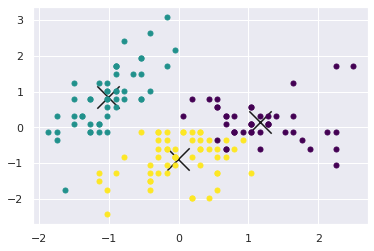

In [0]:
################################################ 
######## K means clustering 'by hand' ##########

#standard imports
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn.datasets import load_iris

#import the iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data)
X = (X-np.mean(X,axis=0))/np.std(X,axis=0)
 
def centers_init(X,n_clusters):
    '''
    Initialize all cluster centers with random numbers that lie
    with in the range of each feature's min and max value
    '''
    n, p = X.shape
    rng = np.random.RandomState(0)
    return pd.DataFrame(np.array([rng.uniform(np.min(X.values[:,i]), 
                                np.max(X.values[:,i]), 
                                (n_clusters,1)) for i in range(p)])
                                .reshape(n_clusters,p))
    #return pd.DataFrame(rng.uniform(X.min(),X.max(),(n_clusters,p)))

def distance(X, centers):
    '''
    Use the L2 norm as a distance metric 
    '''
    dX = X.values[:,np.newaxis,:] - centers.values[np.newaxis,:,:]
    return np.linalg.norm(dX,axis=-1)

def Kmeans(X, n_clusters=3):
    '''
    Implement k-means cluster on X
    Default number of clusters is 3
    '''
    n, p = X.shape 
    centers = centers_init(X, n_clusters)

    # update the centers and reassign the labels until convergence is reached
    while True:
      d = distance(X,centers)
      labels = np.argmin(d,axis=1)
      cluster_means = X.groupby(labels).agg('mean')
      old_centers = centers.copy()
      centers.update(cluster_means)

      #break out of loop when convergence is reached
      if (centers==old_centers).all(axis=None):
        d = distance(X,centers)
        labels = np.argmin(d,axis=1)
        break 
    return labels, centers

n_clusters = 3
labels,centers = Kmeans(X,n_clusters)
print(centers)

# plot the results
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # plot styling
from matplotlib import cm
viridis = cm.get_cmap('viridis', n_clusters)
for i in range(len(X)):
  plt.plot(X.values[i,0],X.values[i,1], color = viridis(labels[i]), marker = 'o', markersize = 5)
plt.scatter(centers.values[:,0], centers.values[:,1], color = 'k', marker = 'x', s = 500)

[[ 1.13597027  0.08842168  0.99615451  1.01752612]
 [-1.01457897  0.85326268 -1.30498732 -1.25489349]
 [-0.05021989 -0.88337647  0.34773781  0.2815273 ]]


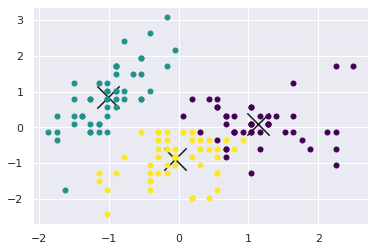

In [0]:
from sklearn.cluster import KMeans
import numpy as np
#import the iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data)
X = (X-np.mean(X,axis=0))/np.std(X,axis=0)
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
labels, centers = kmeans.labels_, kmeans.cluster_centers_
print(centers)

# plot the results
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # plot styling
from matplotlib import cm
viridis = cm.get_cmap('viridis', n_clusters)
for i in range(len(X)):
  plt.plot(X.values[i,0],X.values[i,1], color = viridis(labels[i]), marker = 'o', markersize = 5)
plt.scatter(centers[:,0], centers[:,1], color = 'k', marker = 'x', s = 500)
